<a href="https://colab.research.google.com/github/johnsl01/income2/blob/master/loadtest6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###############################################
#@title           Drive Access                #
###############################################


todo = "deal with non numeric columns amd the missing data "

print (todo)

print ('drive access')

from google.colab import drive
drive.mount('/content/gdrive')
!ls '/content/gdrive/My Drive/income'

deal with non numeric columns amd the missing data 
drive access
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
tcd-ml-1920-group-income-test.csv  tcd-ml-1920-group-income-train.csv


In [4]:
###############################################
#@title             Imports                   #
###############################################


print ('imports')

from datetime import datetime as dt

from __future__ import print_function

import math

from math import sqrt

from IPython import display

import pandas as pd

import numpy as np

# import sklearn as skl
from sklearn import linear_model
from sklearn import neural_network as nnet
from sklearn import svm
from sklearn import ensemble
from sklearn import metrics

from sklearn.ensemble import IsolationForest

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr
from scipy.stats import spearmanr

# include the TensorFlow libraries 
import tensorflow as tf
from tensorflow.python.data import Dataset

# tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

# plotting utilities
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as a3d

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam 

print(dt.now())

imports
2020-07-28 17:18:08.924788


Using TensorFlow backend.


In [5]:
###############################################
#@title         myscale() function              #
###############################################


# define a function to take a pair of series and return a scaled 0-1 pair 
# using the min & max from both to apply the scale.
# typically used to pass a pair of cols from A TRAIN / TEST set
# and return then scaled values in a similar pair of series.

def myscale ( trainseries, testseries ) : 

  # create the return series
  # trainscale = pd.Series ( np.zeros(len(trainseries)))
  # testscale =  pd.Series ( np.zeros(len(testseries)))
  
  # print ('in myscale')

  # print ("Initial : " )
  # print ("  max : ")
  # print ("    ", trainseries.max(), testseries.max())
  maxseries = max(trainseries.max(), testseries.max())
  # print ("    ", maxseries) 

  # print ("  min : ")
  # print ("    ",trainseries.min(), testseries.min())
  minseries = min(trainseries.min(), testseries.min())
  # print ("    ", minseries)

  rangeseries = maxseries - minseries

  trainscale = (trainseries - minseries)/ rangeseries
  testscale = (testseries - minseries)/ rangeseries

  # print ("\nEncoded : " )
  # print ("  max : ")
  # print ("    ", trainscale.max(), testscale.max())
  maxscale = max(trainscale.max(), testscale.max())
  # print ("    ", maxscale) 

  # print ("  min : ")
  # print ("    ",trainscale.min(), testscale.min())
  minscale = min(trainscale.min(), testscale.min())
  # print ("    ", minscale)

  # print (trainscale.sum(), testscale.sum())

  return (trainscale, testscale)

print(dt.now())

2020-07-28 17:18:23.824575


In [6]:
###############################################
#@title           data loads                  #
###############################################


print ('data loads')

print ("train")
print(dt.now())
training_path = "/content/gdrive/My Drive/income/tcd-ml-1920-group-income-train.csv"
# print ("nrows set to 100")
# train_df = pd.read_csv(training_path, nrows=10000)
train_df = pd.read_csv(training_path)

print ("test")
print(dt.now())
test_path = "/content/gdrive/My Drive/income/tcd-ml-1920-group-income-test.csv"
# test_df = pd.read_csv(test_path, nrows=10000)
test_df = pd.read_csv(test_path)

print(dt.now())

data loads
train
2020-07-28 17:18:32.143304


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


test
2020-07-28 17:18:36.298463
2020-07-28 17:18:37.842956


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
print (train_df.shape)
print (test_df.shape)

print(dt.now())

(1048574, 17)
(369438, 17)
2020-07-28 17:18:50.413334


In [8]:
print (" train_df :")
print (train_df.columns)

print ("\n test_df :")
print (test_df.columns)

print("\n", dt.now())

 train_df :
Index(['Instance', 'Year of Record', 'Housing Situation',
       'Crime Level in the City of Employement',
       'Work Experience in Current Job [years]', 'Satisfation with employer',
       'Gender', 'Age', 'Country', 'Size of City', 'Profession',
       'University Degree', 'Wears Glasses', 'Hair Color', 'Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)',
       'Total Yearly Income [EUR]'],
      dtype='object')

 test_df :
Index(['Instance', 'Year of Record', 'Housing Situation',
       'Crime Level in the City of Employement',
       'Work Experience in Current Job [years]', 'Satisfation with employer',
       'Gender', 'Age', 'Country', 'Size of City', 'Profession',
       'University Degree', 'Wears Glasses', 'Hair Color', 'Body Height [cm]',
       'Yearly Income in addition to Salary (e.g. Rental Income)',
       'Total Yearly Income [EUR]'],
      dtype='object')

 2020-07-28 17:18:56.310428


In [9]:
###############################################
#@title           Column Renames              #
###############################################


# dont like the col names - much easier with simple strings with no spaces.
train_df.rename(columns = {"Year of Record" : "Year",
                           "Housing Situation" : "Housing",
                           "Crime Level in the City of Employement" : "CrimeLevel",
                           "Work Experience in Current Job [years]" : "WorkExp",
                           "Satisfation with employer" : "Satisfaction",
                           "Size of City" : "CitySize",
                           "University Degree" : "Degree",
                           "Wears Glasses" : "Glasses",
                           "Hair Color" : "Hair",
                           "Body Height [cm]" : "Height",
                           "Yearly Income in addition to Salary (e.g. Rental Income)" : "AdditionalIncome",
                           "Total Yearly Income [EUR]" : "Income"},
                  inplace = True)

test_df.rename( columns = {"Year of Record" : "Year",
                           "Housing Situation" : "Housing",
                           "Crime Level in the City of Employement" : "CrimeLevel",
                           "Work Experience in Current Job [years]" : "WorkExp",
                           "Satisfation with employer" : "Satisfaction",
                           "Size of City" : "CitySize",
                           "University Degree" : "Degree",
                           "Wears Glasses" : "Glasses",
                           "Hair Color" : "Hair",
                           "Body Height [cm]" : "Height",
                           "Yearly Income in addition to Salary (e.g. Rental Income)" : "AdditionalIncome",
                           "Total Yearly Income [EUR]" : "Income"},
                  inplace = True)

print(dt.now())

2020-07-28 17:19:04.706594


In [10]:
print (" train_df :")
print (train_df.columns)

print ("\n test_df :")
print (test_df.columns)

print("\n", dt.now())

 train_df :
Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income'],
      dtype='object')

 test_df :
Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income'],
      dtype='object')

 2020-07-28 17:19:15.831813


In [11]:
print(train_df.head())

print(dt.now())

   Instance   Year Housing  CrimeLevel  ...   Hair Height AdditionalIncome  Income
0         1 1940.0       0          33  ...  Black    182            0 EUR  6182.1
1         2 1940.0       0          25  ...  Blond    172            0 EUR  6819.7
2         3 1940.0       0          34  ...  Blond    144            0 EUR  8663.5
3         4 1940.0       0          70  ...  Brown    152            0 EUR  2400.6
4         5 1940.0       0          51  ...  Black    180            0 EUR  2816.2

[5 rows x 17 columns]
2020-07-28 17:19:25.063402


In [12]:
print ( train_df.describe() )
print (train_df[["Instance", "Year", "CrimeLevel", "Age", "CitySize", "Glasses", "Height", "Income"]].describe() )

print(dt.now())

       Instance      Year  CrimeLevel  ...   Glasses    Height    Income
count 1048574.0 1044561.0   1048574.0  ... 1048574.0 1048574.0 1048574.0
mean   495114.1    1979.4        83.5  ...       0.5     175.2   68509.7
std    278454.9      22.4        50.0  ...       0.5      19.9  111929.8
min         1.0    1940.0         0.0  ...       0.0      82.0       6.4
25%    262144.2    1961.0        40.0  ...       0.0     160.0    5333.7
50%    489008.5    1979.0        84.0  ...       1.0     174.0   21890.8
75%    729565.8    1998.0       125.0  ...       1.0     190.0   86030.5
max    991709.0    2019.0       206.0  ...       1.0     272.0 2548791.0

[8 rows x 8 columns]
       Instance      Year  CrimeLevel  ...   Glasses    Height    Income
count 1048574.0 1044561.0   1048574.0  ... 1048574.0 1048574.0 1048574.0
mean   495114.1    1979.4        83.5  ...       0.5     175.2   68509.7
std    278454.9      22.4        50.0  ...       0.5      19.9  111929.8
min         1.0    1940.0    

In [13]:
print ( train_df[['Satisfaction','Gender','Country','Profession','Degree','Hair','AdditionalIncome']].describe() )

print(dt.now())

       Satisfaction  Gender   Country  ...    Degree    Hair AdditionalIncome
count       1010487  974447   1048574  ...    967974  978363          1048574
unique            4       6       174  ...         5       6            88309
top         Average    male  Honduras  ...  Bachelor   Black            0 EUR
freq         487634  400113    111155  ...    396585  400652           946048

[4 rows x 7 columns]
2020-07-28 17:19:40.372605


In [14]:
print ( train_df[['WorkExp']].describe() )

print(dt.now())

        WorkExp
count   1048574
unique      109
top          12
freq      49606
2020-07-28 17:19:45.068727


In [15]:
print ( train_df[['Housing']].describe() )

print(dt.now())

            Housing
count       1048574
unique           10
top     Large House
freq         166291
2020-07-28 17:19:48.861733


In [16]:
'''
print('checking pearson and spearman corellations') 



x = np.array([1,2,3,4,5])
y0 = np.array([1,1.4,1.7,2,2.1]) # aproximate roots
y1 = np.array([2,4.2,6,7,10]) # aproximately linear
y2 = np.array([0.9,4.1, 9.5, 17, 27]) # aproximate squares
y3 = np.array([0.9,8.1, 27.5, 68, 133]) # aproximate cubes

print (pearsonr(x,y0), spearmanr(x,y0))
print (pearsonr(x,y1), spearmanr(x,y1))
print (pearsonr(x,y2), spearmanr(x,y2))
print (pearsonr(x,y3), spearmanr(x,y3))
'''
print(dt.now())


2020-07-28 17:19:54.895381


In [17]:
print ("run pearson and spearman analysis for our full numeric columns against the income result")
print ("pearson test for linear correlation - spearman for monotonic corelation (which may not be linear) \n")

# 'Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
# 'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
# 'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income'

print (" 0 Instance : ",
       pearsonr(train_df[ 'Instance'], train_df['Income']),
       spearmanr(train_df[ 'Instance'], train_df['Income']),
       "  -  quite a high, but somewhat non linear corelation. Why ? \n")

print (" 1 Year has missing data. \n")
# print ("Year : ", pearsonr(train_df[ 'Year'], train_df['Income']))

print (" 2 Housing is categorical incl some numerical. \n")

print (" 3 CrimeLevel : ",
       pearsonr(train_df[ 'CrimeLevel'], train_df['Income']),
       spearmanr(train_df[ 'CrimeLevel'], train_df['Income']),
       "  -  Very little corelation. \n")

print (" 4 Age: ",
       pearsonr(train_df[ 'Age'], train_df['Income']),
       spearmanr(train_df[ 'Age'], train_df['Income']),
       "  -  Very little corelation. \n")

print (" 5 WorkExp is categorical incl some numerical. \n")

print (" 6 Satisfaction is categorical - with missing values. \n")

print (" 7 Gender is categorical. \n")

print (" 8 Country is categorical. \n")

print (" 9 CitySize : ",
       pearsonr(train_df[ 'CitySize'], train_df['Income']),
       spearmanr(train_df[ 'CitySize'], train_df['Income']),
       "  -  Slight correlation - but not linear. \n")

print ("10 Profession is categorical. \n")

print ("11 Degree is categorical. \n")

print ("12 Glasses : ",
       pearsonr(train_df[ 'Glasses'], train_df['Income']),
       spearmanr(train_df[ 'Glasses'], train_df['Income']),
       "  -  No correlation - drop the column it's just noise. \n")

print ("13 Hair is categorical. \n")

print ("14 Height : ",
       pearsonr(train_df[ 'Height'], train_df['Income']),
       spearmanr(train_df[ 'Height'], train_df['Income']),
       "  -  Almost no correlation - drop the column it's just noise. \n")

print ("15 AdditionalIncome is categorical incl some numerical. \n")

print ("16 Income : ",
       pearsonr(train_df[ 'Income'], train_df['Income']),
       spearmanr(train_df[ 'Income'], train_df['Income']),
       "  -  perfect correlation - just to test - it had better be! \n")

print(dt.now())

run pearson and spearman analysis for our full numeric columns against the income result
pearson test for linear correlation - spearman for monotonic corelation (which may not be linear) 

 0 Instance :  (0.63097762117061, 0.0) SpearmanrResult(correlation=0.8495902029025076, pvalue=0.0)   -  quite a high, but somewhat non linear corelation. Why ? 

 1 Year has missing data. 

 2 Housing is categorical incl some numerical. 

 3 CrimeLevel :  (-0.04625273201268572, 0.0) SpearmanrResult(correlation=-0.04312210980226222, pvalue=0.0)   -  Very little corelation. 

 4 Age:  (0.10067153027768558, 0.0) SpearmanrResult(correlation=0.07849967806951791, pvalue=0.0)   -  Very little corelation. 

 5 WorkExp is categorical incl some numerical. 

 6 Satisfaction is categorical - with missing values. 

 7 Gender is categorical. 

 8 Country is categorical. 

 9 CitySize :  (0.02163675039874434, 8.622972818061319e-109) SpearmanrResult(correlation=0.15108002597127201, pvalue=0.0)   -  Slight correlatio

In [18]:
###############################################
#@title            Instance                   #
###############################################


print (" --------  Instance  -------")
# Instance 
# encode as a scaled value 

'''
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.Instance.max(), test_df.Instance.max())
maxInstance = max(train_df.Instance.max(), test_df.Instance.max())
print ("    ", maxInstance) 

print ("  min : ")
print ("    ",train_df.Instance.min(), test_df.Instance.min())
minInstance = min(train_df.Instance.min(), test_df.Instance.min())
print ("    ", minInstance)

rangeInstance = maxInstance - minInstance
train_df.loc[:, 'InstanceEnc'] = (train_df['Instance']-minInstance) / rangeInstance

test_df.loc[:, 'InstanceEnc'] = (test_df['Instance']-minInstance) / rangeInstance

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.InstanceEnc.max(), test_df.InstanceEnc.max())
maxInstanceEnc = max(train_df.InstanceEnc.max(), test_df.InstanceEnc.max())
print ("    ", maxInstanceEnc) 

print ("  min : ")
print ("    ",train_df.InstanceEnc.min(), test_df.InstanceEnc.min())
minInstanceEnc = min(train_df.InstanceEnc.min(), test_df.InstanceEnc.min())
print ("    ", minInstanceEnc)


'''

train_df[ 'InstanceEnc'], test_df[ 'InstanceEnc'] = myscale ( train_df.Instance, test_df.Instance) 

print (" 0 Instance : ",
       pearsonr(train_df[ 'InstanceEnc'], train_df['Income']),
       spearmanr(train_df[ 'InstanceEnc'], train_df['Income']),
       "  -  quite high, but somewhat non linear corelation. Why ? \n")

print(dt.now())


 --------  Instance  -------
 0 Instance :  (0.63097762117061, 0.0) SpearmanrResult(correlation=0.8495902029025076, pvalue=0.0)   -  quite high, but somewhat non linear corelation. Why ? 

2020-07-28 17:21:24.210553


In [ ]:
# so go through the remaining columns - decide what to do with them 
# and then test the correlation between the treated value and the income



In [19]:
###############################################
#@title            Year                       #
###############################################


print (" --------  Year  -------\n")

# missing data but otherwise numeric between 1940 and 2019 

# lets fill with an out of range value and chart it 
# then look at the charts and correlations and decide on a strategy 

# done - fill with rounded mean 1979.0 (1979)

train_df.Year.fillna(1979.0, inplace=True)

test_df.Year.fillna(1979.0, inplace=True)

print ("train_df :")
print ( train_df['Year'].describe() )

print("test_df :")
print (test_df['Year'].describe() )

print(dt.now())

 --------  Year  -------

train_df :
count   1048574.0
mean       1979.4
std          22.4
min        1940.0
25%        1961.0
50%        1979.0
75%        1998.0
max        2019.0
Name: Year, dtype: float64
test_df :
count   369438.0
mean      1979.5
std         23.1
min       1940.0
25%       1960.0
50%       1979.0
75%       1999.0
max       2019.0
Name: Year, dtype: float64
2020-07-28 17:21:38.213113


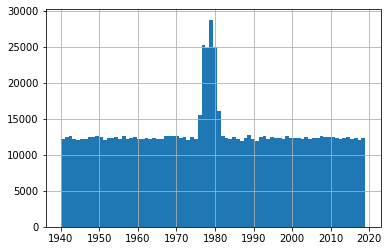

In [22]:
 train_df['Year'].hist(bins=80)

In [21]:
print (" 1 Year : ",
       pearsonr(train_df[ 'Year'], train_df['Income']),
       spearmanr(train_df[ 'Year'], train_df['Income']),
       "  -  Good correlation - almost the same as Instance - slightly non linear. \n")

# 1 Year :  (0.6310504764919517, 0.0) SpearmanrResult(correlation=0.8495098504454566, pvalue=0.0) - 1939 fillna
# 1 Year :  (0.6317759175887114, 0.0) SpearmanrResult(correlation=0.8503274082842994, pvalue=0.0) - 2020 fillna
# 1 Year :  (0.6353301585949168, 0.0) SpearmanrResult(correlation=0.854775189253737,  pvalue=0.0) - 1979.0 fillna ==> use this 

print(dt.now())

 1 Year :  (0.6353301585949168, 0.0) SpearmanrResult(correlation=0.854775189253737, pvalue=0.0)   -  Good correlation - almost the same as Instance - slightly non linear. 

2020-07-28 17:21:58.655080


In [23]:
# encode as a scaled value : 

# Year
# encode as a scaled value 

'''
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.Year.max(), test_df.Year.max())
maxYear = max(train_df.Year.max(), test_df.Year.max())
print ("    ", maxYear) 

print ("  min : ")
print ("    ",train_df.Year.min(), test_df.Year.min())
minYear = min(train_df.Year.min(), test_df.Year.min())
print ("    ", minYear)

rangeYear = maxYear - minYear
train_df.loc[:, 'YearEnc'] = (train_df['Year']-minYear) / rangeYear

test_df.loc[:, 'YearEnc'] = (test_df['Year']-minYear) / rangeYear

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.YearEnc.max(), test_df.YearEnc.max())
maxYearEnc = max(train_df.YearEnc.max(), test_df.YearEnc.max())
print ("    ", maxYearEnc) 

print ("  min : ")
print ("    ",train_df.YearEnc.min(), test_df.YearEnc.min())
minYearEnc = min(train_df.YearEnc.min(), test_df.YearEnc.min())
print ("    ", minYearEnc)
'''

train_df[ 'YearEnc'], test_df[ 'YearEnc'] = myscale ( train_df.Year, test_df.Year) 

print (" 1 Year : ",
       pearsonr(train_df[ 'YearEnc'], train_df['Income']),
       spearmanr(train_df[ 'YearEnc'], train_df['Income']),
       "  -  quite a high, but somewhat non linear corelation. Why ? \n")

print ( train_df.YearEnc.sum(), test_df.YearEnc.sum() )
# 523471.29113924055 184765.36708860757

print(dt.now())


 1 Year :  (0.6353301585949167, 0.0) SpearmanrResult(correlation=0.854775189253737, pvalue=0.0)   -  quite a high, but somewhat non linear corelation. Why ? 

523471.29113924055 184765.36708860757
2020-07-28 17:22:25.856264


In [24]:
###############################################
#@title            Housing                    #
###############################################


# Housing

print ("train_df :")
print( train_df.Housing.unique() )

print ("test_df :")
print ( test_df.Housing.unique() )

print(dt.now())

train_df :
[0 '0' 'nA' 'Castle' 'Large House' 'Medium House' 'Small House'
 'Large Apartment' 'Medium Apartment' 'Small Apartment']
test_df :
['Small House' 'Castle' 'Large House' 'Large Apartment' '0' 'nA'
 'Medium Apartment' 'Medium House' 'Small Apartment']
2020-07-28 17:22:55.082397


In [25]:
housingcount = 0

print ('train_df')
print ("        mean       std-dev         count    max    min      Housing")

for i in train_df.Housing.unique() :
  print (train_df.loc[train_df.Housing == i].Income.mean(),
         train_df.loc[train_df.Housing == i].Income.std(),
         train_df.loc[train_df.Housing == i].Instance.count(),
         train_df.loc[train_df.Housing == i].Income.max(),
         train_df.loc[train_df.Housing == i].Income.min(),
         " ---- ", i)
  housingcount += train_df.loc[train_df.Housing == i].Instance.count()
print('sum of counts : ', housingcount, "\n")

housingcounttest = 0
print ('test_df')
print ("  count     Housing")
for i in test_df.Housing.unique() :
  print (test_df.loc[test_df.Housing == i].Instance.count(),       
         " ---- ", i)
  housingcounttest += test_df.loc[test_df.Housing == i].Instance.count()
print('sum of counts : ',housingcounttest, "\n")

# use mean encoding - may adjust to a smoothed mean or James-Stein later

#build a map and then use it 
mean_encode = train_df.groupby('Housing')['Income'].mean()

print(type(mean_encode))
print (mean_encode)

extra_encode = pd.Series ([1.0, 2.0], index=["Avg_1","Avg_2"])

mean_encode = mean_encode.append(extra_encode)

print(type(mean_encode))
print (mean_encode)


train_df.loc[:, 'HousingEnc1'] = train_df['Housing'].map(mean_encode)

test_df.loc[:, 'HousingEnc1'] = test_df['Housing'].map(mean_encode)

print (train_df.columns)
print (test_df.columns)

print ("\n 17 HousingEnc1 : ",
       pearsonr(train_df[ 'HousingEnc1'], train_df['Income']),
       spearmanr(train_df[ 'HousingEnc1'], train_df['Income']),
       "  -  good correlation - slightly non linear. \n")

print(dt.now())

train_df
        mean       std-dev         count    max    min      Housing
8417.809658660803 25468.91014861237 65536 544746.0 6.37  ----  0
9206.339050352215 23950.588723855963 76481 544785.0 8.72  ----  0
11160.420324219114 24687.925709603776 124052 544706.0 19.38  ----  nA
15257.786112998365 25035.788412178175 124551 544676.0 76.32  ----  Castle
24359.2940305252 27694.325407587337 166291 544601.0 109.92  ----  Large House
39850.41893912264 35693.49012165257 138527 544537.0 339.36  ----  Medium House
77083.61277714121 57561.91027640494 123710 989118.75 990.52  ----  Small House
152213.2762913269 108759.06828123573 124341 1562624.73 4016.65  ----  Large Apartment
273213.9203738765 178755.49356100726 97547 2548790.96 4910.15  ----  Medium Apartment
346543.81184398994 212339.60000462199 7538 2332659.88 25596.63  ----  Small Apartment
sum of counts :  1048574 

test_df
  count     Housing
46075  ----  Small House
46375  ----  Castle
45909  ----  Large House
46282  ----  Large Apartment


In [26]:

# encode as a scaled value 

'''
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.HousingEnc1.max(), test_df.HousingEnc1.max())
maxHousing = max(train_df.HousingEnc1.max(), test_df.HousingEnc1.max())
print ("    ", maxHousing) 

print ("  min : ")
print ("    ",train_df.HousingEnc1.min(), test_df.HousingEnc1.min())
minHousing = min(train_df.HousingEnc1.min(), test_df.HousingEnc1.min())
print ("    ", minHousing)

rangeHousing = maxHousing - minHousing
train_df.loc[:, 'HousingEnc'] = (train_df['HousingEnc1']-minHousing) / rangeHousing

test_df.loc[:, 'HousingEnc'] = (test_df['HousingEnc1']-minHousing) / rangeHousing

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.HousingEnc.max(), test_df.HousingEnc.max())
maxHousingEnc = max(train_df.HousingEnc.max(), test_df.HousingEnc.max())
print ("    ", maxHousingEnc) 

print ("  min : ")
print ("    ",train_df.HousingEnc.min(), test_df.HousingEnc.min())
minHousingEnc = min(train_df.HousingEnc.min(), test_df.HousingEnc.min())
print ("    ", minHousingEnc)

'''
train_df[ 'HousingEnc'], test_df[ 'HousingEnc'] = myscale ( train_df.HousingEnc1, test_df.HousingEnc1 ) 


print (" 2 Housing : ",
       pearsonr(train_df[ 'HousingEnc'], train_df['Income']),
       spearmanr(train_df[ 'HousingEnc'], train_df['Income']),
       "  -  quite a high, but somewhat non linear corelation. ? \n")

print(dt.now())

 2 Housing :  (0.7431611526144238, 0.0) SpearmanrResult(correlation=0.844274810513409, pvalue=0.0)   -  quite a high, but somewhat non linear corelation. ? 

2020-07-28 17:23:20.498722


In [27]:
###############################################
#@title            WorkExp                    #
###############################################


# WorkExp


print ("train_df :")
print( train_df.WorkExp.unique() )

print ("test_df :")
print ( test_df.WorkExp.unique() )

print(dt.now())

train_df :
['17' '4.9' '21' '18' '8' '15' '12' '6.3' '13' '14' '22' '26' '10' '29'
 '23' '11' '24' '20' '19' '9' '16' '25' '30' '6' '27' '31' '7' '28' '5.6'
 '34' '35' '33' '38' '3.5' '32' '37' '36' '4.2' '4' '#NUM!' '5' '39' '42'
 '44' '40' '2.8' 19.0 20.0 14.0 15.0 22.0 10.0 13.0 16.0 17.0 23.0 6.3
 12.0 8.0 25.0 11.0 18.0 26.0 7.0 28.0 21.0 32.0 9.0 4.2 5.6 29.0 27.0
 24.0 35.0 31.0 30.0 4.9 5.0 34.0 6.0 4.0 36.0 33.0 3.5 37.0 38.0 40.0
 39.0 41.0 42.0 2.8 '41' '3' '2.1' '1.4' '43' 0.7 44.0 2.1 '45' 43.0 0.0
 '48' '2' 3.0 45.0 '0' 2.0 47.0]
test_df :
[12.0 20.0 11.0 14.0 17.0 10.0 15.0 18.0 24.0 21.0 16.0 23.0 27.0 9.0 6.3
 13.0 29.0 19.0 6.0 22.0 8.0 26.0 25.0 7.0 30.0 4.9 28.0 31.0 5.0 5.6 32.0
 35.0 37.0 4.2 34.0 33.0 3.5 36.0 3.0 38.0 4.0 39.0 2.1 40.0 42.0 43.0
 '22' '11' '9' '12' '25' '8' '27' '14' '18' '26' '17' '38' '13' '10' '16'
 '23' '24' '6.3' '20' '19' '15' '28' '30' '5' '21' '7' '36' '31' '29'
 '5.6' '6' '4.2' '4.9' '32' '33' '34' '37' '35' '41' '40' '4' '47' '3.5'
 '#

In [28]:
workexpcount = 0
workexpcounttest = 0 

print (" train contents counts")
print (" train     test      WorkExp")


input= train_df.WorkExp.unique() 
strs = list(filter(lambda x : type(x) ==str,input))
ints = list(filter(lambda x: type(x) == int, input))
floats = list(filter(lambda x: type(x) == float, input))
output = sorted(strs) + sorted(ints) + sorted(floats)


for i in output :
  thiscount = train_df.loc[train_df.WorkExp == i].Instance.count()
  thiscounttest = test_df.loc[test_df.WorkExp == i].Instance.count()
  thismean = train_df.loc[train_df.WorkExp == i].Income.mean()
  thisstd = train_df.loc[train_df.WorkExp == i].Income.std()
  workexpcount += thiscount
  workexpcounttest += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismean, "  ----  ", thisstd )
print("sum of count   train : ", workexpcount, '   test : ', workexpcounttest )

workexpcount2 = 0
workexpcounttest2 = 0 

print (" test contents counts ")
print (" train     test      WorkExp")

input= test_df.WorkExp.unique() 
strs = list(filter(lambda x : type(x) ==str,input))
ints = list(filter(lambda x: type(x) == int, input))
floats = list(filter(lambda x: type(x) == float, input))
output = sorted(strs) + sorted(ints) + sorted(floats)

for i in output :
  thiscount = train_df.loc[train_df.WorkExp == i].Instance.count()
  thiscounttest = test_df.loc[test_df.WorkExp == i].Instance.count()
  thismeantest = train_df.loc[train_df.WorkExp == i].Income.mean()
  thisstdtest = train_df.loc[train_df.WorkExp == i].Income.std()
  workexpcount2 += thiscount
  workexpcounttest2 += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismeantest, "  ----  ", thisstdtest )
print("sum of count   train : ", workexpcount2, '   test : ', workexpcounttest2 )

print (float(2.0))
print (float('2.0'))


for i in [7.0, '7', 17.0, '17', 27.0, '27', 37.0, '37', '#NUM!'] : 
  print ( train_df.loc[train_df.WorkExp == i].Income.mean(), ' --- ', i, type(i) )

print(dt.now())


 train contents counts
 train     test      WorkExp
48  ---  15  ---  #NUM! <class 'str'>   ----   544474.4583333334   ----   311.7412974323784
1  ---  0  ---  0 <class 'str'>   ----   544427.0   ----   nan
3  ---  0  ---  1.4 <class 'str'>   ----   3728.22   ----   4684.4989124985395
44909  ---  17081  ---  10 <class 'str'>   ----   44859.02509229748   ----   78264.44642573356
49315  ---  18479  ---  11 <class 'str'>   ----   47290.90591604929   ----   83666.04396698915
49606  ---  18955  ---  12 <class 'str'>   ----   48476.35609563372   ----   86519.13448507237
47885  ---  18627  ---  13 <class 'str'>   ----   49791.99770700648   ----   88482.22823248347
48056  ---  18272  ---  14 <class 'str'>   ----   51965.37395600992   ----   92667.43069950797
46804  ---  17636  ---  15 <class 'str'>   ----   52878.72946372096   ----   94736.09079406636
44872  ---  17048  ---  16 <class 'str'>   ----   54501.69342195591   ----   97456.4240370417
41893  ---  15854  ---  17 <class 'str'>   ----   

In [29]:
# string and number comparison 
# - have to be carefuel that python is not being too clever 
'''
if 7.0 == '7.0' : 
  print ('Is equal!')
else : 
  print ('not equal!')

print(dt.now())
'''

"\nif 7.0 == '7.0' : \n  print ('Is equal!')\nelse : \n  print ('not equal!')\n\nprint(dt.now())\n"

In [30]:
# implement mean encoding for WorkExp
# what of teh two that are in test but not in train 
# which are 1.4 <class 'float'> & 47  <class 'str'>
# either global mean encode or mean of either side - which - pref for more manual either side approach
# initially just pick better of either side 47  <class 'str'>

#build a map and then use it 
mean_encode = train_df.groupby('WorkExp')['Income'].mean()
# print (mean_encode)
# print (type(mean_encode))

extras = pd.Series ([20259.65,56575.42], index=[1.4, '47'])
# print (extras)

mean_encode = mean_encode.append(extras)
# print (mean_encode)
# print (type(mean_encode))

train_df.loc[:, 'WorkExpEnc1'] = train_df['WorkExp'].map(mean_encode)

test_df.loc[:, 'WorkExpEnc1'] = test_df['WorkExp'].map(mean_encode)

print (train_df.columns)
print (test_df.columns)

print ("\n 17 WorkExpEnc1 : ",
       pearsonr(train_df[ 'WorkExpEnc1'], train_df['Income']),
       spearmanr(train_df[ 'WorkExpEnc1'], train_df['Income']),
       "  -  not much correlation despite mean encoding \n")

print(dt.now())

Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income',
       'InstanceEnc', 'YearEnc', 'HousingEnc1', 'HousingEnc', 'WorkExpEnc1'],
      dtype='object')
Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income',
       'InstanceEnc', 'YearEnc', 'HousingEnc1', 'HousingEnc', 'WorkExpEnc1'],
      dtype='object')

 17 WorkExpEnc1 :  (0.2007371563551865, 0.0) SpearmanrResult(correlation=0.19425821486433636, pvalue=0.0)   -  not much correlation despite mean encoding 

2020-07-28 17:24:44.238125


In [31]:
# encode Work Exp as a scaled value : 

# WorkExp 
# encode as a scaled value 

'''
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.WorkExpEnc1.max(), test_df.WorkExpEnc1.max())
maxWorkExp = max(train_df.WorkExpEnc1.max(), test_df.WorkExpEnc1.max())
print ("    ", maxWorkExp) 

print ("  min : ")
print ("    ",train_df.WorkExpEnc1.min(), test_df.WorkExpEnc1.min())
minWorkExp = min(train_df.WorkExpEnc1.min(), test_df.WorkExpEnc1.min())
print ("    ", minWorkExp)

rangeWorkExp = maxWorkExp - minWorkExp
train_df.loc[:, 'WorkExpEnc'] = (train_df['WorkExpEnc']-minWorkExp) / rangeWorkExp

test_df.loc[:, 'WorkExpEnc'] = (test_df['WorkExpEnc1']-minWorkExp) / rangeWorkExp

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.WorkExpEnc.max(), test_df.WorkExpEnc.max())
maxWorkExpEnc = max(train_df.WorkExpEnc.max(), test_df.WorkExpEnc.max())
print ("    ", maxWorkExpEnc) 

print ("  min : ")
print ("    ",train_df.WorkExpEnc.min(), test_df.WorkExpEnc.min())
minWorkExpEnc = min(train_df.WorkExpEnc.min(), test_df.WorkExpEnc.min())
print ("    ", minWorkExpEnc)
'''

train_df[ 'WorkExpEnc'], test_df[ 'WorkExpEnc'] = myscale ( train_df.WorkExpEnc1, test_df.WorkExpEnc1 ) 

# and check correlation is preserved

print (" 5 WorkExp : ",
       pearsonr(train_df[ 'WorkExpEnc'], train_df['Income']),
       spearmanr(train_df[ 'WorkExpEnc'], train_df['Income']),
       "  -  slight corelation \n")

print(dt.now())

 5 WorkExp :  (0.20073715635518646, 0.0) SpearmanrResult(correlation=0.19425821486433636, pvalue=0.0)   -  slight corelation 

2020-07-28 17:24:54.561486


In [32]:
###############################################
#@title            Satisfaction               #
###############################################


# Satisfaction
print ("train_df :")
print( train_df.Satisfaction.unique() )

print ("\n test_df :")
print ( test_df.Satisfaction.unique() )

print("\n", dt.now())


train_df :
['Unhappy' 'Average' 'Happy' 'Somewhat Happy' nan]

 test_df :
['Average' 'Happy' 'Somewhat Happy' nan 'Unhappy']

 2020-07-28 17:25:00.450683


In [33]:

satisfactioncount = 0
satisfactioncounttest = 0

for i in train_df.Satisfaction.unique() :
  thiscount = train_df.loc[train_df.Satisfaction == i].Instance.count()
  thiscounttest = test_df.loc[test_df.Satisfaction == i].Instance.count()
  thismean = train_df.loc[train_df.Satisfaction == i].Income.mean()
  thisstd = train_df.loc[train_df.Satisfaction == i].Income.std()
  satisfactioncount += thiscount
  satisfactioncounttest += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismean, "  ----  ", thisstd )

print("record count   train : ", len(train_df.Instance), '   test : ', len(test_df.Instance) )
print("sum of count   train : ", satisfactioncount, '   test : ', satisfactioncounttest )

# replace the NANs with "Undecided"
train_df["Satisfaction"].fillna("Undecided", inplace = True) 
test_df["Satisfaction"].fillna("Undecided", inplace = True) 

satisfactioncount = 0
satisfactioncounttest = 0

for i in train_df.Satisfaction.unique() :
  thiscount = train_df.loc[train_df.Satisfaction == i].Instance.count()
  thiscounttest = test_df.loc[test_df.Satisfaction == i].Instance.count()
  thismean = train_df.loc[train_df.Satisfaction == i].Income.mean()
  thisstd = train_df.loc[train_df.Satisfaction == i].Income.std()
  satisfactioncount += thiscount
  satisfactioncounttest += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismean, "  ----  ", thisstd )

print("record count   train : ", len(train_df.Instance), '   test : ', len(test_df.Instance) )
print("sum of count   train : ", satisfactioncount, '   test : ', satisfactioncounttest )

print("\n", dt.now())

15201  ---  6332  ---  Unhappy <class 'str'>   ----   157393.90898625058   ----   216877.02205764758
487634  ---  171392  ---  Average <class 'str'>   ----   65225.79279158221   ----   104786.54475298432
351808  ---  123781  ---  Happy <class 'str'>   ----   68667.00406841355   ----   117503.32113066837
155844  ---  54501  ---  Somewhat Happy <class 'str'>   ----   68420.2974915309   ----   98639.98180797772
0  ---  0  ---  nan <class 'float'>   ----   nan   ----   nan
record count   train :  1048574    test :  369438
sum of count   train :  1010487    test :  356006
15201  ---  6332  ---  Unhappy <class 'str'>   ----   157393.90898625058   ----   216877.02205764758
487634  ---  171392  ---  Average <class 'str'>   ----   65225.79279158221   ----   104786.54475298432
351808  ---  123781  ---  Happy <class 'str'>   ----   68667.00406841355   ----   117503.32113066837
155844  ---  54501  ---  Somewhat Happy <class 'str'>   ----   68420.2974915309   ----   98639.98180797772
38087  ---  13

In [34]:
# use mean encoding - may adjust to a smoothed mean or James-Stein later

#build a map and then use it 
mean_encode = train_df.groupby('Satisfaction')['Income'].mean()
print (mean_encode)

train_df.loc[:, 'SatisfactionEnc1'] = train_df['Satisfaction'].map(mean_encode)

test_df.loc[:, 'SatisfactionEnc1'] = test_df['Satisfaction'].map(mean_encode)

print (train_df.columns)
print (test_df.columns)

print ("\n 18 SatisfactionEnc1 : ",
       pearsonr(train_df[ 'SatisfactionEnc1'], train_df['Income']),
       spearmanr(train_df[ 'SatisfactionEnc1'], train_df['Income']),
       "  -  Minimum correlation - could consider not using it - just adds noise. \n")

print("\n", dt.now())

Satisfaction
Average           65225.8
Happy             68667.0
Somewhat Happy    68420.3
Undecided         73993.0
Unhappy          157393.9
Name: Income, dtype: float64
Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income',
       'InstanceEnc', 'YearEnc', 'HousingEnc1', 'HousingEnc', 'WorkExpEnc1',
       'WorkExpEnc', 'SatisfactionEnc1'],
      dtype='object')
Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income',
       'InstanceEnc', 'YearEnc', 'HousingEnc1', 'HousingEnc', 'WorkExpEnc1',
       'WorkExpEnc', 'SatisfactionEnc1'],
      dtype='object')

 18 SatisfactionEnc1 :  (0.09813265344382163, 0.0) SpearmanrResult(correlation=0.0057278007006581755, pvalue=4.48

In [35]:
# Scale the value
train_df[ 'SatisfactionEnc'], test_df[ 'SatisfactionEnc'] = myscale ( train_df.SatisfactionEnc1, test_df.SatisfactionEnc1 ) 



print (" 6 Satisfaction : ",
       pearsonr(train_df[ 'SatisfactionEnc'], train_df['Income']),
       spearmanr(train_df[ 'SatisfactionEnc'], train_df['Income']),
       "  -  Minimum correlation - could consider not using it - just adds noise. \n")

print("\n", dt.now())

 6 Satisfaction :  (0.0981326534438217, 0.0) SpearmanrResult(correlation=0.0057278007006581755, pvalue=4.483120708689596e-09)   -  Minimum correlation - could consider not using it - just adds noise. 


 2020-07-28 17:25:27.631974


In [36]:
###############################################
#@title            Gender                     #
###############################################


# Gender

print (" train_df :")
print( train_df.Gender.unique() )

print ("\n test_df :")
print ( test_df.Gender.unique() )

print("\n", dt.now())

 train_df :
['other' 'female' 'male' nan 'unknown' '0' 'f']

 test_df :
['other' nan 'male' 'female' 'f' 'unknown' '0']

 2020-07-28 17:25:32.691779


In [37]:
# check values and fill in NAs
gendercount = 0
gendercounttest = 0

for i in train_df. Gender.unique() :
  thiscount = train_df.loc[train_df.Gender == i].Instance.count()
  thiscounttest = test_df.loc[test_df.Gender == i].Instance.count()
  thismean = train_df.loc[train_df.Gender == i].Income.mean()
  thisstd = train_df.loc[train_df.Gender == i].Income.std()
  gendercount += thiscount
  gendercounttest += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismean, "  ----  ", thisstd )

print("record count   train : ", len(train_df.Instance), '   test : ', len(test_df.Instance) )
print("sum of count   train : ", gendercount, '   test : ', gendercounttest )

# replace the NANs with "Missing"
train_df["Gender"].fillna("Missing", inplace = True) 
test_df["Gender"].fillna("Missing", inplace = True) 

gendercount = 0
gendercounttest = 0

for i in train_df.Gender.unique() :
  thiscount = train_df.loc[train_df.Gender == i].Instance.count()
  thiscounttest = test_df.loc[test_df.Gender == i].Instance.count()
  thismean = train_df.loc[train_df.Gender == i].Income.mean()
  thisstd = train_df.loc[train_df.Gender == i].Income.std()
  gendercount += thiscount
  gendercounttest += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismean, "  ----  ", thisstd )

print("record count   train : ", len(train_df.Instance), '   test : ', len(test_df.Instance) )
print("sum of count   train : ", gendercount, '   test : ', gendercounttest )

print("\n", dt.now())

252053  ---  88688  ---  other <class 'str'>   ----   71399.96173753282   ----   116552.39298861871
237489  ---  83235  ---  female <class 'str'>   ----   50288.77522992694   ----   77408.47423402575
400113  ---  140972  ---  male <class 'str'>   ----   68722.11991124932   ----   112584.0842370958
0  ---  0  ---  nan <class 'float'>   ----   nan   ----   nan
62957  ---  22441  ---  unknown <class 'str'>   ----   72731.14825674625   ----   118511.95562548703
6804  ---  2338  ---  0 <class 'str'>   ----   73724.88045267489   ----   121206.82804167588
15031  ---  5456  ---  f <class 'str'>   ----   301473.25204444013   ----   185536.4971161734
record count   train :  1048574    test :  369438
sum of count   train :  974447    test :  343130
252053  ---  88688  ---  other <class 'str'>   ----   71399.96173753282   ----   116552.39298861871
237489  ---  83235  ---  female <class 'str'>   ----   50288.77522992694   ----   77408.47423402575
400113  ---  140972  ---  male <class 'str'>   ---- 

In [38]:
# use mean encoding - may adjust to a smoothed mean or James-Stein later

#build a map and then use it 
mean_encode = train_df.groupby('Gender')['Income'].mean()
print (mean_encode)

train_df.loc[:, 'GenderEnc1'] = train_df['Gender'].map(mean_encode)

test_df.loc[:, 'GenderEnc1'] = test_df['Gender'].map(mean_encode)

print (train_df.columns)
print (test_df.columns)

print ("\n 18 GenderEnc1 : ",
       pearsonr(train_df[ 'GenderEnc1'], train_df['Income']),
       spearmanr(train_df[ 'GenderEnc1'], train_df['Income']),
       "  -  Small correlation - should contribute a bit. \n")

print("\n", dt.now())

Gender
0          73724.9
Missing    64609.4
f         301473.3
female     50288.8
male       68722.1
other      71400.0
unknown    72731.1
Name: Income, dtype: float64
Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income',
       'InstanceEnc', 'YearEnc', 'HousingEnc1', 'HousingEnc', 'WorkExpEnc1',
       'WorkExpEnc', 'SatisfactionEnc1', 'SatisfactionEnc', 'GenderEnc1'],
      dtype='object')
Index(['Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
       'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
       'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income',
       'InstanceEnc', 'YearEnc', 'HousingEnc1', 'HousingEnc', 'WorkExpEnc1',
       'WorkExpEnc', 'SatisfactionEnc1', 'SatisfactionEnc', 'GenderEnc1'],
      dtype='object')

 18 GenderEnc1 :  (0.2616226071599889, 0.0) Spearm

In [39]:
# Scale the value
train_df[ 'GenderEnc'], test_df[ 'GenderEnc'] = myscale ( train_df.GenderEnc1, test_df.GenderEnc1 ) 

print (" 7 Gender : ",
       pearsonr(train_df[ 'GenderEnc'], train_df['Income']),
       spearmanr(train_df[ 'GenderEnc'], train_df['Income']),
       "  -  Small correlation - should contribute a bit. \n")

print("\n", dt.now())

 7 Gender :  (0.261622607159989, 0.0) SpearmanrResult(correlation=0.08366667031295193, pvalue=0.0)   -  Small correlation - should contribute a bit. 


 2020-07-28 17:25:56.264243


In [40]:
###############################################
#@title           Country                     #
###############################################


# Country

print (" train_df :")
print( train_df.Country.unique() )

print ("\n test_df :")
print ( test_df.Country.unique() )

print("\n", dt.now())

 train_df :
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Belarus' 'Belgium' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Fiji' 'Finland'
 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Greece' 'Grenada' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iraq'
 'Ireland' 'Israel' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Mauritania' 'Mauritius' 'Micronesia' 'Moldova' 'Mongolia'
 'Montenegro' 'Morocco' 'Moza

In [41]:
# check values and fill in NAs
countrycount = 0
countrycounttest = 0

print (" train_df :")
for i in sorted( train_df.Country.unique().tolist() ) :
  thiscount = train_df.loc[train_df.Country == i].Instance.count()
  thiscounttest = test_df.loc[test_df.Country == i].Instance.count()
  thismean = train_df.loc[train_df.Country == i].Income.mean()
  thisstd = train_df.loc[train_df.Country == i].Income.std()
  countrycount += thiscount
  countrycounttest += thiscounttest
  print (" -+++++++- ", thiscount + thiscounttest, " -+- ", thiscount, " -++- ", thiscounttest, " -+++- ", i, type(i), " -++++- ", thismean, " -+++++- ", thisstd, " -++++++- " )

print("record count   train : ", len(train_df.Instance), '   test : ', len(test_df.Instance) )
print("sum of count   train : ", countrycount, '   test : ', countrycounttest )

# replace the NANs with "Missing"
# train_df["Country"].fillna("Unknown", inplace = True) 
test_df["Country"].fillna("Unknown", inplace = True) 

countrycount = 0
countrycounttest = 0

print ("\n test_df :")
for i in sorted( test_df.Country.unique().tolist() ) :
  thiscount = train_df.loc[train_df.Country == i].Instance.count()
  thiscounttest = test_df.loc[test_df.Country == i].Instance.count()
  thismean = train_df.loc[train_df.Country == i].Income.mean()
  thisstd = train_df.loc[train_df.Country == i].Income.std()
  countrycount += thiscount
  countrycounttest += thiscounttest
  print ( " -+++++++- ", thiscount + thiscounttest, " -+- ", thiscount, " -++- ", thiscounttest, " -+++- ", i, type(i), " -++++- ", thismean, " -+++++- ", thisstd, " -++++++- ")

print("record count   train : ", len(train_df.Instance), '   test : ', len(test_df.Instance) )
print("sum of count   train : ", countrycount, '   test : ', countrycounttest )

print("\n", dt.now())

 train_df :
 -+++++++-  2  -+-  2  -++-  0  -+++-  0 <class 'str'>  -++++-  136556.055  -+++++-  99930.44456655864  -++++++- 
 -+++++++-  186  -+-  122  -++-  64  -+++-  Afghanistan <class 'str'>  -++++-  191828.95327868854  -+++++-  323261.86109116365  -++++++- 
 -+++++++-  4848  -+-  3475  -++-  1373  -+++-  Albania <class 'str'>  -++++-  135701.55056690663  -+++++-  185007.79264120176  -++++++- 
 -+++++++-  108  -+-  76  -++-  32  -+++-  Algeria <class 'str'>  -++++-  248576.24157894732  -+++++-  323130.7139699207  -++++++- 
 -+++++++-  622  -+-  446  -++-  176  -+++-  Angola <class 'str'>  -++++-  181059.7981165918  -+++++-  235937.65341544247  -++++++- 
 -+++++++-  1  -+-  1  -++-  0  -+++-  Antigua and Barbuda <class 'str'>  -++++-  27670.05  -+++++-  nan  -++++++- 
 -+++++++-  83  -+-  60  -++-  23  -+++-  Argentina <class 'str'>  -++++-  245934.46416666664  -+++++-  305468.04335784685  -++++++- 
 -+++++++-  5864  -+-  4274  -++-  1590  -+++-  Armenia <class 'str'>  -++++-  1247

In [42]:
# encode using mean encoding and also use a total count encoding 
# for countries only in test use overall mean - and hope that the count picks 
# it up - would be tempting to use a mean for a country with a similar count.

# means for countries with similar counts (or equal for lower counts)
# for all countries missing in train_df

'''
Egypt	484811.7491
United Kingdom	573221.8324
Unknown	484811.7491
Uruguay	158495.8342
Uzbekistan	278893.7784
Vanuatu	414758.4535
Venezuela	239445.9115
Vietnam	484811.7491
Yemen	250653.3961
Zambia	165889.0433
Zimbabwe	137950.3644
'''

'\nEgypt\t484811.7491\nUnited Kingdom\t573221.8324\nUnknown\t484811.7491\nUruguay\t158495.8342\nUzbekistan\t278893.7784\nVanuatu\t414758.4535\nVenezuela\t239445.9115\nVietnam\t484811.7491\nYemen\t250653.3961\nZambia\t165889.0433\nZimbabwe\t137950.3644\n'

In [43]:
#build a map and then use it 
mean_encode = train_df.groupby('Country')['Income'].mean()

# print(type(mean_encode))
# print (mean_encode)

# build a map for the contries not in train (values derived based on nearest neighbours by count)
extra_encode = pd.Series ([484811.7491, 573221.8324, 484811.7491,
                           158495.8342, 278893.7784, 414758.4535,
                           239445.9115, 484811.7491,250653.3961,
                           165889.0433, 137950.3644],
                    index=["Egypt", "United Kingdom", "Unknown",
                           "Uruguay", "Uzbekistan", "Vanuatu",
                           "Venezuela", "Vietnam", "Yemen",
                           "Zambia", "Zimbabwe"])

#combine the two maps
mean_encode = mean_encode.append(extra_encode, verify_integrity=True)

# print(type(mean_encode))
# print (mean_encode)


train_df.loc[:, 'CountryEnc1'] = train_df['Country'].map(mean_encode)

test_df.loc[:, 'CountryEnc1'] = test_df['Country'].map(mean_encode)

print (" train_df :")
print ( train_df['CountryEnc1'].describe() )

print ("\n test_df :")
print ( test_df['CountryEnc1'].describe() )

print("\n", dt.now())

 train_df :
count   1048574.0
mean      68509.7
std       29799.8
min       23752.6
25%       54394.1
50%       56109.1
75%       63964.7
max     2319623.7
Name: CountryEnc1, dtype: float64

 test_df :
count    369438.0
mean      72249.8
std       33005.0
min       48002.3
25%       55234.4
50%       56165.2
75%       77619.5
max     1419633.0
Name: CountryEnc1, dtype: float64

 2020-07-28 17:27:59.998952


In [44]:
# build a map and encode county count as well 

#build a map and then use it 
mean_encode1 = train_df.groupby('Country')['Instance'].count()

# print(type(mean_encode))
# print (mean_encode)

# build a map for the contries not in train (values derived based on nearest neighbours by count)
extra_encode1 = pd.Series ([0,0,0,
                            0,0,0,
                            0,0,0,
                            0,0],
                    index=["Egypt", "United Kingdom", "Unknown",
                           "Uruguay", "Uzbekistan", "Vanuatu",
                           "Venezuela", "Vietnam", "Yemen",
                           "Zambia", "Zimbabwe"])

mean_encode2 = test_df.groupby('Country')['Instance'].count()



#combine the two maps
mean_encode1 = mean_encode1.append(extra_encode1, verify_integrity=True)

mean_encode = mean_encode1.add(mean_encode2, fill_value=0)

# print(type(mean_encode))
print (mean_encode)


train_df.loc[:, 'CountryEnc2'] = train_df['Country'].map(mean_encode)

test_df.loc[:, 'CountryEnc2'] = test_df['Country'].map(mean_encode)

print (" train_df :")
print ( train_df['CountryEnc2'].describe() )

print ("\n test_df :")
print ( test_df['CountryEnc2'].describe() )

print("\n", dt.now())

0                2.0
Afghanistan    186.0
Albania       4848.0
Algeria        108.0
Angola         622.0
               ...  
Venezuela      300.0
Vietnam          1.0
Yemen          254.0
Zambia        1429.0
Zimbabwe      2945.0
Length: 185, dtype: float64
 train_df :
count   1048574.0
mean      29550.9
std       31244.8
min           1.0
25%       15429.0
50%       22257.0
75%       26212.0
max      118000.0
Name: CountryEnc2, dtype: float64

 test_df :
count   369438.0
mean     20569.6
std      15394.8
min          1.0
25%      13990.0
50%      21764.0
75%      25732.0
max     118000.0
Name: CountryEnc2, dtype: float64

 2020-07-28 17:28:07.079872


In [45]:
# check correlation of both - and also with each other


print (" 8 Country : ",
       pearsonr(train_df[ 'CountryEnc1'], train_df['Income']),
       spearmanr(train_df[ 'CountryEnc1'], train_df['Income']),
       "  -  some linear correlation. \n")

print (" 8 Country Count : ",
       pearsonr(train_df[ 'CountryEnc2'], train_df['Income']),
       spearmanr(train_df[ 'CountryEnc2'], train_df['Income']),
       "  -  less correlation and more non-linear \n")

print (" 8 Country : ",
       pearsonr(train_df[ 'CountryEnc1'], train_df['CountryEnc2']),
       spearmanr(train_df[ 'CountryEnc1'], train_df['CountryEnc2']),
       "  -  Moderate linear correlation between the two - better non linear one  - could be that one would do \n")

 8 Country :  (0.266236051504459, 0.0) SpearmanrResult(correlation=0.1774095312870236, pvalue=0.0)   -  some linear correlation. 

 8 Country Count :  (-0.1111191489962976, 0.0) SpearmanrResult(correlation=-0.1734909908085035, pvalue=0.0)   -  less correlation and more non-linear 

 8 Country :  (-0.41737078193724086, 0.0) SpearmanrResult(correlation=-0.8200416932723638, pvalue=0.0)   -  Moderate linear correlation between the two - better non linear one  - could be that one would do 



In [46]:
# scale both and recheck correlations

# Scale the value
train_df[ 'CountryEncA'], test_df[ 'CountryEncA'] = myscale ( train_df.CountryEnc1, test_df.CountryEnc1 ) 

print (" 8 Country : ",
       pearsonr(train_df[ 'CountryEncA'], train_df['Income']),
       spearmanr(train_df[ 'CountryEncA'], train_df['Income']),
       "  -   \n")

# Scale the value
train_df[ 'CountryEncB'], test_df[ 'CountryEncB'] = myscale ( train_df.CountryEnc2, test_df.CountryEnc2 ) 

print (" 8 Country Count : ",
       pearsonr(train_df[ 'CountryEncB'], train_df['Income']),
       spearmanr(train_df[ 'CountryEncB'], train_df['Income']),
       "  -   \n")

print("\n", dt.now())

 8 Country :  (0.26623605150445895, 0.0) SpearmanrResult(correlation=0.1774095312870236, pvalue=0.0)   -   

 8 Country Count :  (-0.1111191489962976, 0.0) SpearmanrResult(correlation=-0.1734909908085035, pvalue=0.0)   -   


 2020-07-28 17:28:51.661841


In [47]:
###############################################
#@title       Correlation Review              #
###############################################


# Review the correlations 

print (" 0 Instance : ",
       pearsonr(train_df[ 'YearEnc'], train_df['Income']),
       spearmanr(train_df[ 'YearEnc'], train_df['Income']),
       "  -  quite high, but somewhat non linear corelation. Why ? \n")
	   
print (" 1 Year : ",
       pearsonr(train_df[ 'YearEnc'], train_df['Income']),
       spearmanr(train_df[ 'YearEnc'], train_df['Income']),
       "  -  quite high, but somewhat non linear corelation. Why ? \n")

print (" 2 Housing : ",
       pearsonr(train_df[ 'HousingEnc'], train_df['Income']),
       spearmanr(train_df[ 'HousingEnc'], train_df['Income']),
       "  -  quite high, but somewhat non linear corelation. ? \n")
	
print (" 3 CrimeLevel : ",
       pearsonr(train_df[ 'CrimeLevel'], train_df['Income']),
       spearmanr(train_df[ 'CrimeLevel'], train_df['Income']),
       "  -  Very little corelation - don't use this data. \n")
	   
print (" 4 Age: ",
       pearsonr(train_df[ 'Age'], train_df['Income']),
       spearmanr(train_df[ 'Age'], train_df['Income']),
       "  -  Very little corelation. Use ? \n")	   
	   
print (" 5 WorkExp : ",
       pearsonr(train_df[ 'WorkExpEnc'], train_df['Income']),
       spearmanr(train_df[ 'WorkExpEnc'], train_df['Income']),
       "  -  slight corelation \n")
	   
print (" 6 Satisfaction : ",
       pearsonr(train_df[ 'SatisfactionEnc'], train_df['Income']),
       spearmanr(train_df[ 'SatisfactionEnc'], train_df['Income']),
       "  -  Minimum correlation - could consider not using it - just adds noise. \n")

print (" 7 Gender : ",
       pearsonr(train_df[ 'GenderEnc'], train_df['Income']),
       spearmanr(train_df[ 'GenderEnc'], train_df['Income']),
       "  -  Small correlation - should contribute a bit. \n")

print (" 8 Country  : ",
       pearsonr(train_df[ 'CountryEncA'], train_df['Income']),
       spearmanr(train_df[ 'CountryEncA'], train_df['Income']),
       "  -   \n")

print ("(8) Country Count : ",
       pearsonr(train_df[ 'CountryEncB'], train_df['Income']),
       spearmanr(train_df[ 'CountryEncB'], train_df['Income']),
       "  -   \n")

 0 Instance :  (0.6353301585949167, 0.0) SpearmanrResult(correlation=0.854775189253737, pvalue=0.0)   -  quite high, but somewhat non linear corelation. Why ? 

 1 Year :  (0.6353301585949167, 0.0) SpearmanrResult(correlation=0.854775189253737, pvalue=0.0)   -  quite high, but somewhat non linear corelation. Why ? 

 2 Housing :  (0.7431611526144238, 0.0) SpearmanrResult(correlation=0.844274810513409, pvalue=0.0)   -  quite high, but somewhat non linear corelation. ? 

 3 CrimeLevel :  (-0.04625273201268572, 0.0) SpearmanrResult(correlation=-0.04312210980226222, pvalue=0.0)   -  Very little corelation - don't use this data. 

 4 Age:  (0.10067153027768558, 0.0) SpearmanrResult(correlation=0.07849967806951791, pvalue=0.0)   -  Very little corelation. Use ? 

 5 WorkExp :  (0.20073715635518646, 0.0) SpearmanrResult(correlation=0.19425821486433636, pvalue=0.0)   -  slight corelation 

 6 Satisfaction :  (0.0981326534438217, 0.0) SpearmanrResult(correlation=0.0057278007006581755, pvalue=4.

In [48]:
# Copy the encoded numeric columns into our training data set

train_df_num = train_df[["InstanceEnc",
                         "YearEnc",
                         "HousingEnc",
                         "WorkExpEnc",
                         # "SatisfactionEnc",
                         "GenderEnc",
                         "CountryEncA",
                         # "CountryEncB"
                         ]] 

# include the known dependant variable values (the thing we are trying to predict)

train_df_num['Income'] = train_df['Income']



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [49]:
train_norm =  train_df[["InstanceEnc",
                        "YearEnc",
                        "HousingEnc",
                        "WorkExpEnc",
                        # "SatisfactionEnc",
                        "GenderEnc",
                        "CountryEncA",
                        # "CountryEncB"
                        ]] 

y_full = train_df["Income"].copy()
miny = y_full.min()
maxy = y_full.max()
y_norm = (y_full.copy() - miny +1 )/ (maxy - miny + 1)                         

print (train_norm.shape, y_norm.shape)

print(dt.now())

(1048574, 6) (1048574,)
2020-07-28 17:29:57.849477


In [50]:
print("Setting up train and test sets")

df = train_norm.copy()

X_train1 = df.copy()
y_train1norm = y_norm.copy()

X_train2, X_test2, y_train2norm, y_test2norm = train_test_split(df, y_norm, test_size=0.20)

X_train3, X_test3, y_train3norm, y_test3norm = train_test_split(df, y_norm, test_size=0.20)


print(dt.now())

Setting up train and test sets
2020-07-28 17:30:06.930039


In [51]:
print("reasembling the un-normalised test sets")

y_train1  = ((y_train1norm.copy() * (maxy - miny + 1)) + miny -1)


y_train2 = ((y_train2norm.copy() * (maxy - miny + 1)) + miny -1)
y_test2 = ((y_test2norm.copy() * (maxy - miny + 1)) + miny -1)

y_train3 = ((y_train3norm.copy() * (maxy - miny + 1)) + miny -1)
y_test3 = ((y_test3norm.copy() * (maxy - miny + 1)) + miny -1)

print ('y_train1 after  : ', y_train1.shape)

print ('y_train2 after  : ', y_train2.shape)
print ('y_test2 after  : ', y_test2.shape)


print ('y_train3 after  : ', y_train3.shape)
print ('y_test3 after  : ', y_test3.shape)

print(dt.now())

reasembling the un-normalised test sets
y_train1 after  :  (1048574,)
y_train2 after  :  (838859,)
y_test2 after  :  (209715,)
y_train3 after  :  (838859,)
y_test3 after  :  (209715,)
2020-07-28 17:30:11.607199


In [ ]:
# run before from here to set up data

In [52]:
# create the model using the available data : 

# Currently 6 : 
# InstanceEnc 
# YearEnc 
# HousingEnc
# WorkExpEnc
# SatisfactionEnc
# GenderEnc

modelwidth = 20

k1model = Sequential()
k1model.add(Dense(units=modelwidth, activation='elu', input_dim=6))
k1model.add(Dense(units=modelwidth, activation='relu'))
k1model.add(Dense(units=modelwidth, activation='softmax'))
k1model.add(Dense(units=1, activation="linear"))
k1model.compile(loss="mse", optimizer=Adam(lr=1e-4, decay=1e-4 / 200))


k2model = Sequential()
k2model.add(Dense(units=modelwidth, activation='elu', input_dim=6))
k2model.add(Dense(units=modelwidth, activation='relu'))
k2model.add(Dense(units=modelwidth, activation='softmax'))
k2model.add(Dense(units=1, activation="linear"))
k2model.compile(loss="mse", optimizer=Adam(lr=1e-4, decay=1e-4 / 200))

k3model = Sequential()
k3model.add(Dense(units=modelwidth, activation='elu', input_dim=6))
k3model.add(Dense(units=modelwidth, activation='relu'))
k3model.add(Dense(units=modelwidth, activation='softmax'))
k3model.add(Dense(units=1, activation="linear"))
k3model.compile(loss="mse", optimizer=Adam(lr=1e-4, decay=1e-4 / 200))

print(dt.now())

2020-07-28 17:30:34.406803


In [ ]:
# run before here to complete data setup and model compilaton

In [63]:
print(dt.now())

pred_bat_sz = 32768

epcs = 19     # number of measurement cycles 
mini_epcs = 2   # number of actual epochs pers measurement cycle
# actual number of epochs is the product of these two

big_bat_sz = 512
nudge_bat_sz = 8
# nudges = [100,200,300,400,500,600,700,800,900]
# nudges = [10,20,30,40,50,60,70,80,90,100,110,120,130]
nudges = [10,20,30,40,50,60,70,80,90]
# nudges = [10,20,30,40]

rmsetrain1 = np.zeros(epcs)
rmsetrain2 = np.zeros(epcs)
rmsetest2  = np.zeros(epcs)
rmsetrain3 = np.zeros(epcs)
rmsetest3  = np.zeros(epcs)

print ( 'Epochs =', epcs*mini_epcs, '   Batch Size =', big_bat_sz, '   Measurement Cycles =',epcs)
print ( 'Nudges at Epochs :', nudges , '   Nudge Batch Size =', nudge_bat_sz )

for i in range (epcs) :

  if i in nudges :
    bat_sz = nudge_bat_sz
    print("-- nudge --")
  else : 
    bat_sz = big_bat_sz

  k3model.fit(X_train3, y_train3norm, epochs=mini_epcs, batch_size=bat_sz, verbose=0)

  ypred3norm = k3model.predict(X_train3, batch_size=pred_bat_sz)
  ypred3 = ((ypred3norm.copy() * (maxy - miny + 1)) + miny -1)
  ktrain3RMS = sqrt ( mean_squared_error(y_train3, ypred3))

  ytestpred3norm = k3model.predict(X_test3, batch_size=bat_sz)
  ytestpred3 = ((ytestpred3norm.copy() * (maxy - miny + 1)) + miny -1)
  ktest3RMS = sqrt ( mean_squared_error(y_test3, ytestpred3))
  # print (' 80-20 split :  RMSE-Train ', ktrain3RMS, ' RMSE_Test ', ktest3RMS)

  k2model.fit(X_train2, y_train2norm, epochs=mini_epcs, batch_size=bat_sz, verbose=0)

  ypred2norm = k2model.predict(X_train2, batch_size=pred_bat_sz)
  ypred2 = ((ypred2norm.copy() * (maxy - miny + 1)) + miny -1)
  ktrain2RMS = sqrt ( mean_squared_error(y_train2, ypred2))

  ytestpred2norm = k2model.predict(X_test2, batch_size=bat_sz)
  ytestpred2 = ((ytestpred2norm.copy() * (maxy - miny + 1)) + miny -1)
  ktest2RMS = sqrt ( mean_squared_error(y_test2, ytestpred2))
  # print (' 88-12 split :  RMSE-Train ', ktrain2RMS, ' RMSE_Test ', ktest2RMS)

  k1model.fit(X_train1, y_train1norm, epochs=mini_epcs, batch_size=bat_sz, verbose=0)

  ypred1norm = k1model.predict(X_train1, batch_size=pred_bat_sz)
  ypred1 = ((ypred1norm.copy() * (maxy - miny + 1)) + miny -1)
  ktrain1RMS = sqrt ( mean_squared_error(y_train1, ypred1))
  # print (' 100% train :  RMSE-Train ', ktrain1RMS)

  rmsetrain1[i] = ktrain1RMS
  rmsetrain2[i] = ktrain2RMS
  rmsetest2[i]  = ktest2RMS
  rmsetrain3[i] = ktrain3RMS
  rmsetest3[i]  = ktest3RMS

  print (i, dt.now(),
         '  100% train :  RMSE-Train ', int(ktrain1RMS), 
         ' 80-20 split :  RMSE-Train ', int(ktrain2RMS), 
         ' RMSE_Test ', int(ktest2RMS), 
         ' 80-20 -2 split :  RMSE-Train ', int(ktrain3RMS), 
         ' RMSE_Test ', int(ktest3RMS),
         '  ', int(ktrain1RMS) - int(rmsetrain1[0]),
         '    ', int(ktrain2RMS) - int(rmsetrain2[0]),
         ' ', int(ktest2RMS) - int(rmsetest2[0]),                      
         '    ', int(ktrain3RMS) - int(rmsetrain3[0]),
         ' ', int(ktest3RMS) - int(rmsetest3[0]) ) 
  
 

  # END for

print(dt.now())

2020-07-28 22:30:06.152201
Epochs = 38    Batch Size = 512    Measurement Cycles = 19
Nudges at Epochs : [10, 20, 30, 40, 50, 60, 70, 80, 90]    Nudge Batch Size = 8
0 2020-07-28 22:30:27.830852   100% train :  RMSE-Train  48993  80-20 split :  RMSE-Train  48847  RMSE_Test  49069  80-20 -2 split :  RMSE-Train  48064  RMSE_Test  48149    0      0   0      0   0
1 2020-07-28 22:30:48.355623   100% train :  RMSE-Train  48826  80-20 split :  RMSE-Train  48786  RMSE_Test  48991  80-20 -2 split :  RMSE-Train  48102  RMSE_Test  48190    -167      -61   -78      38   41
2 2020-07-28 22:31:09.727372   100% train :  RMSE-Train  48852  80-20 split :  RMSE-Train  48764  RMSE_Test  48967  80-20 -2 split :  RMSE-Train  48085  RMSE_Test  48187    -141      -83   -102      21   38
3 2020-07-28 22:31:30.466161   100% train :  RMSE-Train  48859  80-20 split :  RMSE-Train  48767  RMSE_Test  48973  80-20 -2 split :  RMSE-Train  48079  RMSE_Test  48155    -134      -80   -96      15   6
4 2020-07-28 22:31:

Text(0, 0.5, 'Root Mean Square Error')

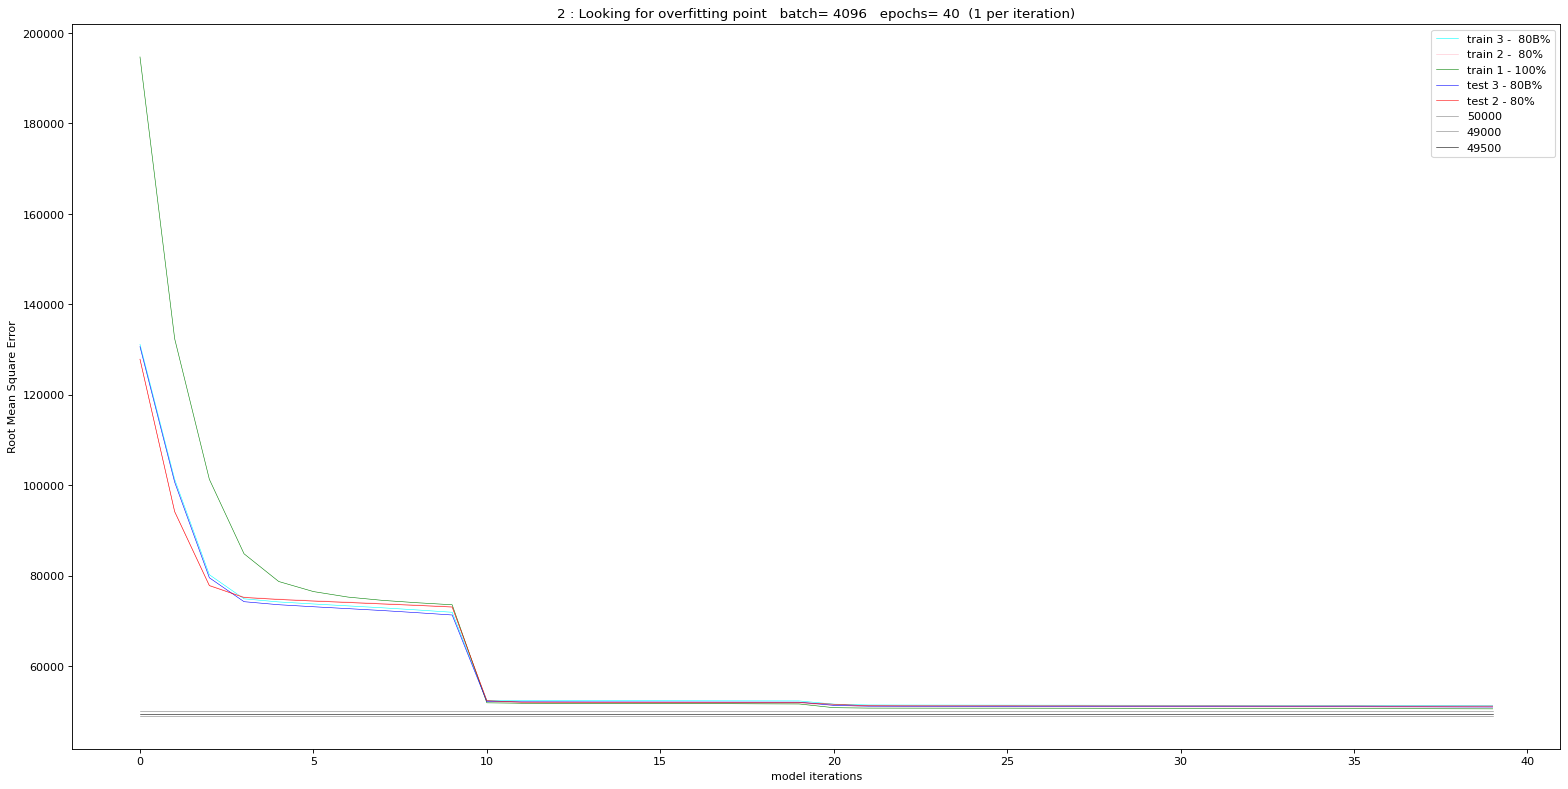

In [54]:
x = range(epcs)

hline1value = 50000
hline2value = 49000
hline3value = 49500
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
hline3 = np.zeros(epcs)
hline3 = hline3 + hline3value
plt.figure(figsize=(24,12), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='grey', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.plot (x, hline3, color='black', label = str(hline3value),linewidth=0.5)
plt.legend();
plt.title("2 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'Root Mean Square Error')

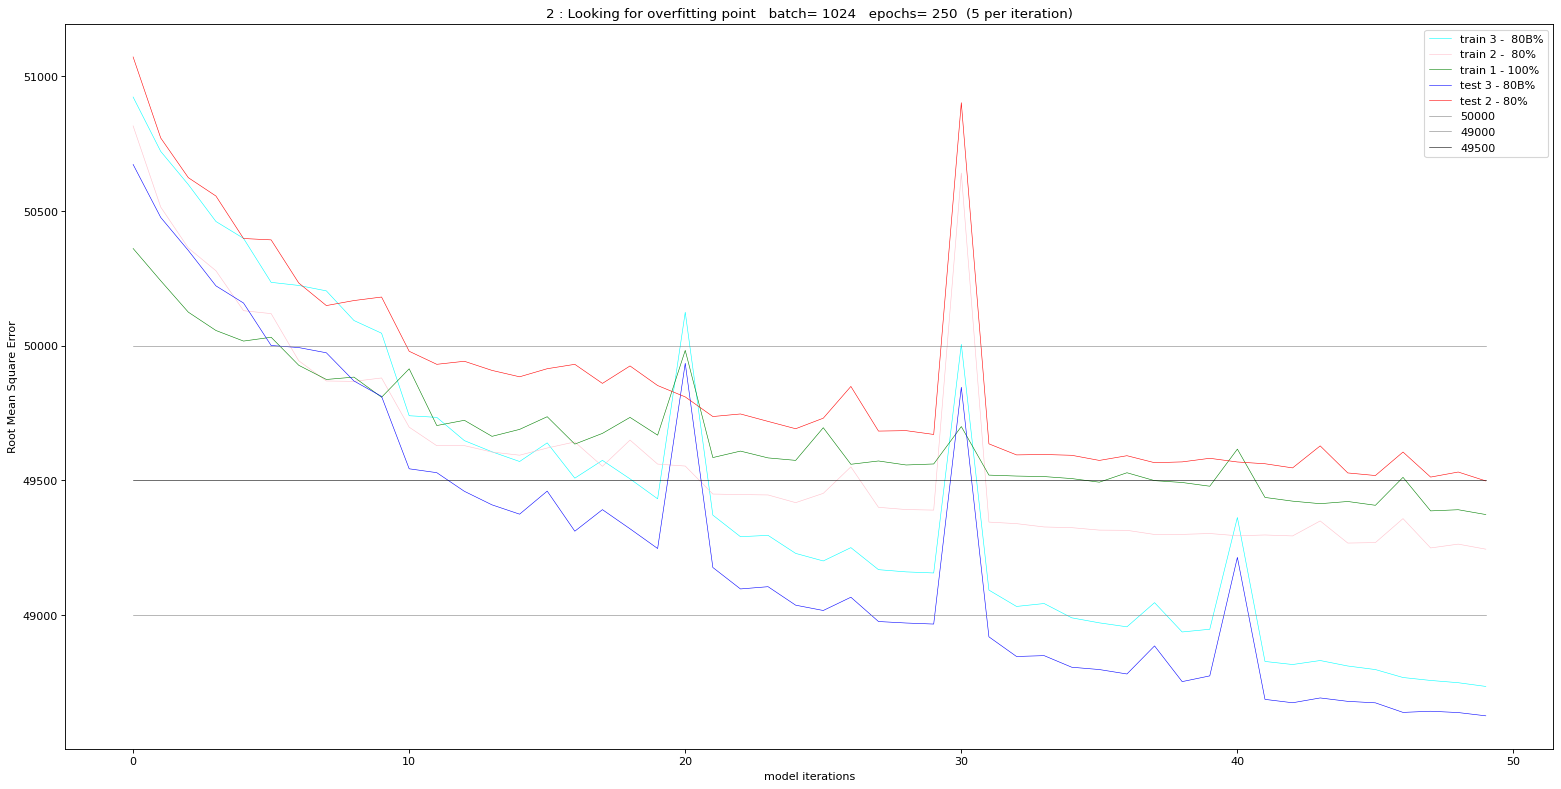

In [56]:
x = range(epcs)

hline1value = 50000
hline2value = 49000
hline3value = 49500
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
hline3 = np.zeros(epcs)
hline3 = hline3 + hline3value
plt.figure(figsize=(24,12), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='grey', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.plot (x, hline3, color='black', label = str(hline3value),linewidth=0.5)
plt.legend();
plt.title("2 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'Root Mean Square Error')

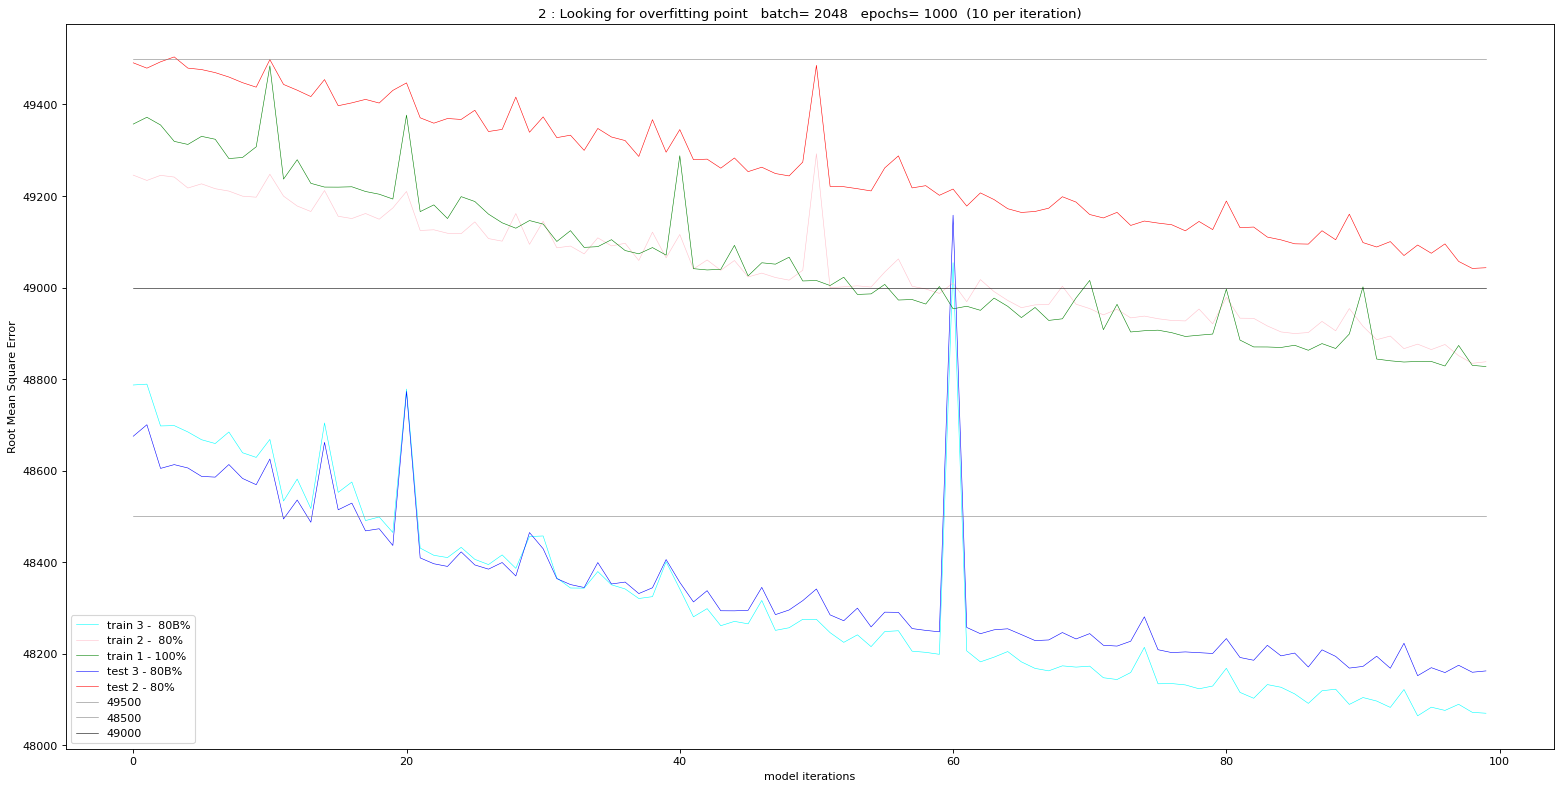

In [58]:
x = range(epcs)

hline1value = 49500
hline2value = 48500
hline3value = 49000
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
hline3 = np.zeros(epcs)
hline3 = hline3 + hline3value
plt.figure(figsize=(24,12), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='grey', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.plot (x, hline3, color='black', label = str(hline3value),linewidth=0.5)
plt.legend();
plt.title("2 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'Root Mean Square Error')

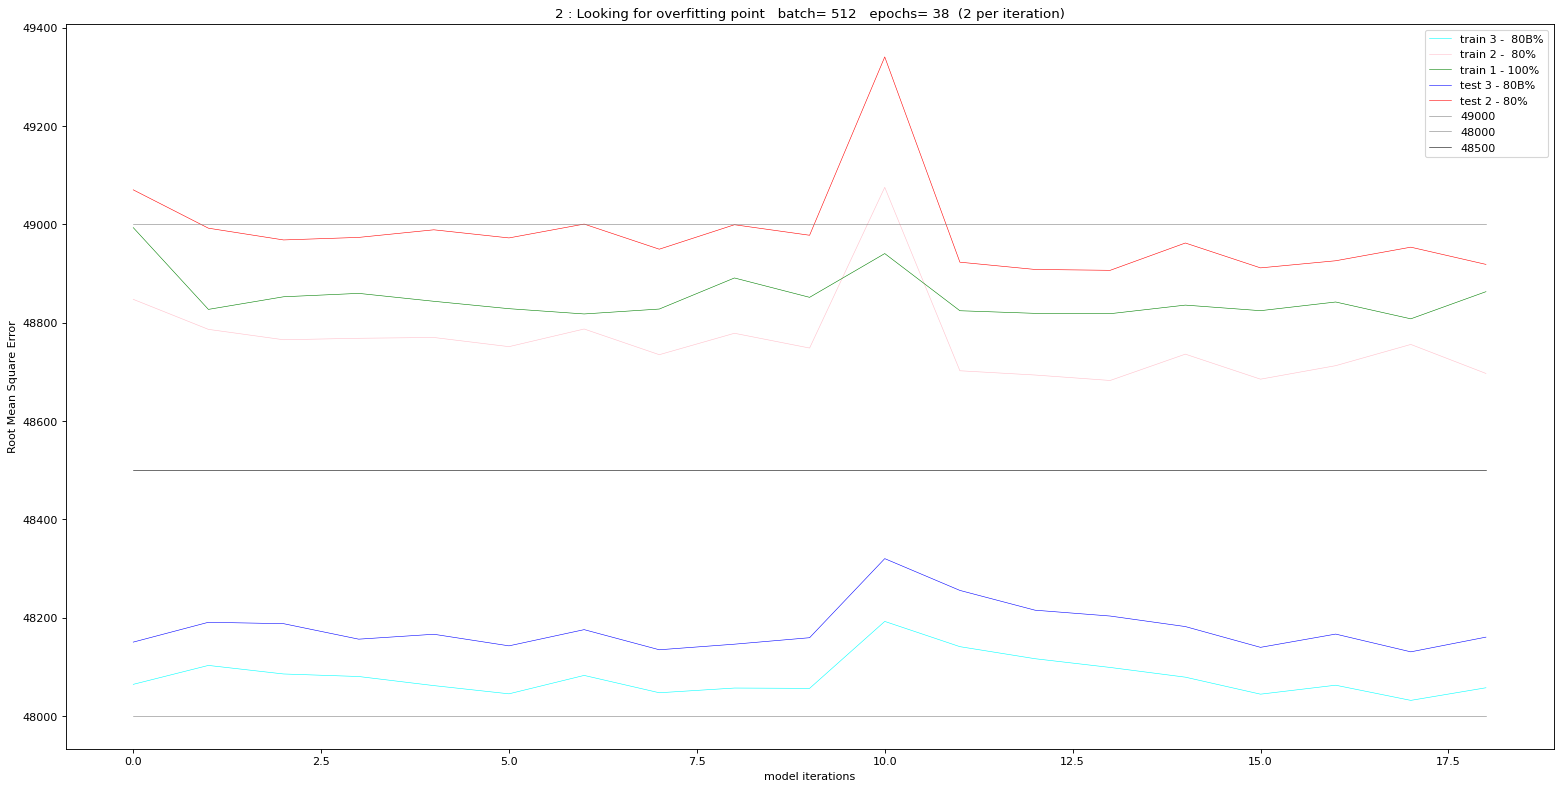

In [64]:
x = range(epcs)

hline1value = 49000
hline2value = 48000
hline3value = 48500
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
hline3 = np.zeros(epcs)
hline3 = hline3 + hline3value
plt.figure(figsize=(24,12), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='grey', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.plot (x, hline3, color='black', label = str(hline3value),linewidth=0.5)
plt.legend();
plt.title("2 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

In [ ]:
steps = [3,7]

for i in range (10) :
  print (i,)
  if i in steps :
    print (" This is a step.")
  else : 
    print (".")
    